In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import backtrader.feeds as btfeed
import backtrader as bt
#import backtrader.avanyzers as btanalyzers
%matplotlib inline
import datetime
from datetime import timedelta
from datetime import date

import backtrader.analyzers as btanalyzers
            
#There are errors with the shorting capabilities here.

In [53]:
download_data =  yf.download("GBPJPY=X",start="2021-08-08",interval = "5m") 
data_feed = bt.feeds.PandasData(dataname=download_data, timeframe=bt.TimeFrame.Minutes, compression=5)

[*********************100%***********************]  1 of 1 completed


In [54]:
class MA_Cross(bt.SignalStrategy):  
    params = (('L_period', 50), ('S_period', 10),)
    lines = ('L_MA','S_MA',)
    def __init__(self):   
        self.lines.L_MA = bt.indicators.MovingAverageSimple(self.data, period=self.p.L_period, plot=True)
        self.lines.S_MA = bt.indicators.MovingAverageSimple(self.data, period=self.p.S_period, plot=True)
        self.cross = bt.ind.CrossOver( self.lines.S_MA, self.lines.L_MA,plot=True)
    
    def next(self):
        if self.position.size > 0 and self.cross > 0:
            self.sell()
            self.sell()
        if self.position.size < 0 and self.cross < 0:
            self.buy()
            self.buy()
                
        if not self.position:
            if self.cross > 0:
                self.buy()
            if self.cross < 0:
                self.sell()

<IPython.core.display.Javascript object>


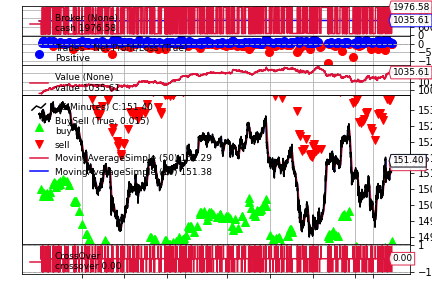

[[<Figure size 432x288 with 6 Axes>]]

In [59]:
cerebro = bt.Cerebro()
cerebro.adddata(data_feed)
cerebro.addstrategy(MA_Cross)
cerebro.broker.setcash(1000)
cerebro.addsizer(bt.sizers.PercentSizer, percents=95)
cerebro.addobserver(bt.observers.Value, plot = True)
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')
cerebro.addanalyzer(btanalyzers.DrawDown, _name='dd')
result = cerebro.run(stdstats=True, timeframe=bt.TimeFrame.Minutes, compression=5)
cerebro.plot()

In [61]:
print(('Final Value:',cerebro.broker.getvalue()), 
('Sharpe Ratio:', result[0].analyzers.mysharpe.get_analysis()),
('Draw Down:', result[0].analyzers.dd.get_analysis()))

('Final Value:', 1035.6079747047468) ('Sharpe Ratio:', OrderedDict([('sharperatio', None)])) ('Draw Down:', AutoOrderedDict([('len', 2495), ('drawdown', 0.9657495146207485), ('moneydown', 10.098909155233514), ('max', AutoOrderedDict([('len', 2495), ('drawdown', 2.5271242193715766), ('moneydown', 26.426311925661366)]))]))
